In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 42s 4us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


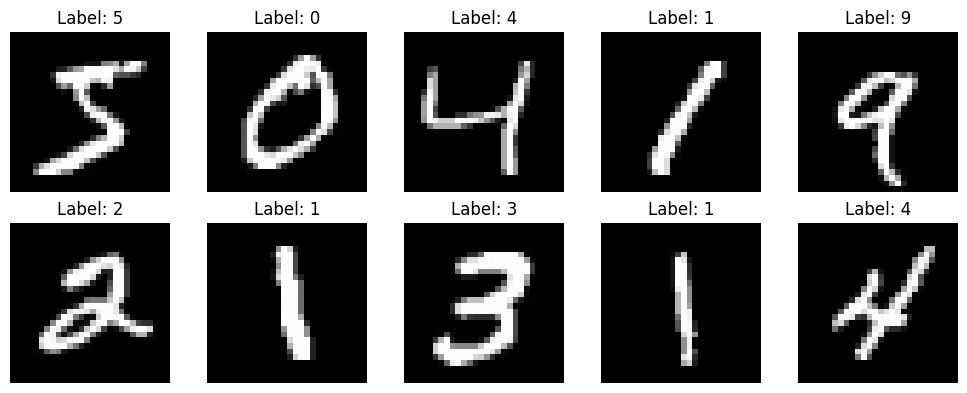

In [4]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())


Min pixel value: 0
Max pixel value: 255


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [8]:
print("Min after normalization:", X_train.min())
print("Max after normalization:", X_train.max())
print(X_train.shape)


Min after normalization: 0.0
Max after normalization: 1.0
(60000, 28, 28)


In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print("Unique labels:", np.unique(y_train))


(60000, 28, 28, 1)
(10000, 28, 28, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [11]:
# Flatten 28x28 images into 1D vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(X_train_flat.shape)
print(X_test_flat.shape)


(60000, 784)
(10000, 784)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [13]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_flat, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
y_pred = model.predict(X_test_flat)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9259


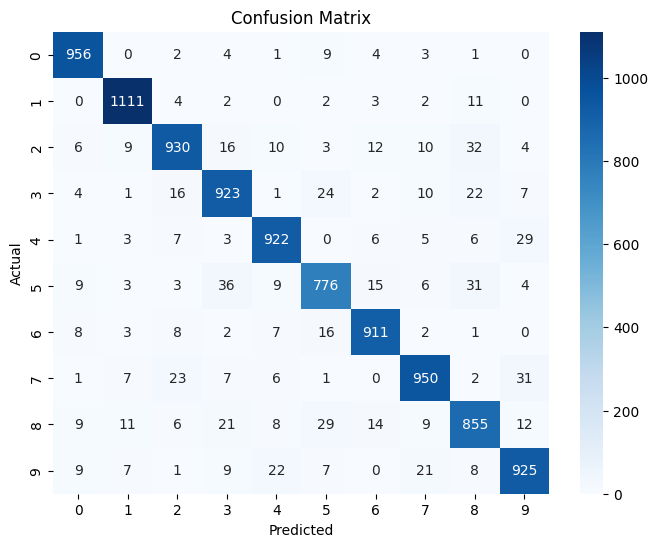

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [19]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(y_train_cat.shape)


(60000, 10)


In [20]:
ann_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\chand\OneDrive\Desktop\digit-recognition\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
ann_history = ann_model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9004 - loss: 0.3539 - val_accuracy: 0.9642 - val_loss: 0.1334
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9586 - loss: 0.1412 - val_accuracy: 0.9670 - val_loss: 0.1141
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9704 - loss: 0.0983 - val_accuracy: 0.9728 - val_loss: 0.0890
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9775 - loss: 0.0751 - val_accuracy: 0.9735 - val_loss: 0.0865
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0594 - val_accuracy: 0.9785 - val_loss: 0.0732


In [23]:
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test_cat)
print("ANN Accuracy:", ann_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0808
ANN Accuracy: 0.975600004196167


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout


In [25]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


c:\Users\chand\OneDrive\Desktop\digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
cnn_history = cnn_model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8951 - loss: 0.3448 - val_accuracy: 0.9818 - val_loss: 0.0663
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9678 - loss: 0.1112 - val_accuracy: 0.9850 - val_loss: 0.0516
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9762 - loss: 0.0822 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9804 - loss: 0.0693 - val_accuracy: 0.9877 - val_loss: 0.0384
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9840 - loss: 0.0568 - val_accuracy: 0.9893 - val_loss: 0.0368


In [28]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test_cat)
print("CNN Accuracy:", cnn_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.0302
CNN Accuracy: 0.989300012588501


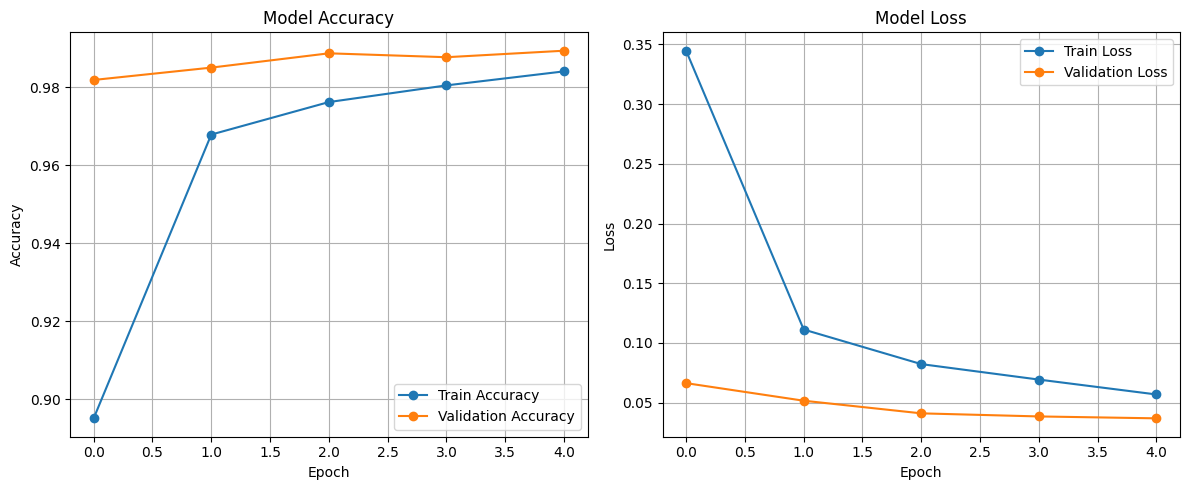

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss', marker='o')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
# Save the model
cnn_model.save("cnn_model.keras")


# To load it later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model("cnn_model.h5")


In [ ]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps

# Load saved CNN model
model = load_model("cnn_model.h5")

st.title("MNIST Digit Recognition")
st.write("Upload a handwritten digit (0–9) and the model will predict it!")

# Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Open the image
    image = Image.open(uploaded_file).convert("L")  # convert to grayscale
    st.image(image, caption='Uploaded Image', use_column_width=True)
    
    # Preprocess image
    image = ImageOps.invert(image)  # invert if background is white
    image = image.resize((28, 28))
    image_array = img_to_array(image)
    image_array = image_array.reshape(1, 28, 28, 1)
    image_array = image_array / 255.0  # normalize

    # Prediction
    prediction = model.predict(image_array)
    predicted_digit = np.argmax(prediction)
    
    st.write(f"**Predicted Digit:** {predicted_digit}")


2025-12-26 22:40:55.339 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:55.737 
  command:

    streamlit run c:\Users\chand\OneDrive\Desktop\digit-recognition\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-26 22:40:55.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:55.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:55.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:55.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:55.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 22:40:

In [36]:
import os
print("Current working directory:")
print(os.getcwd())

print("\nFiles here:")
print(os.listdir())


Current working directory:
c:\Users\chand\OneDrive\Desktop\digit-recognition\notebooks

Files here:
['cnn_model.h5', 'cnn_model.keras', 'mnist_exploration.ipynb']


In [38]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image):
    # Convert PIL image to numpy
    img = np.array(image)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert (MNIST style: white digit on black background)
    gray = cv2.bitwise_not(gray)

    # Threshold to remove background noise
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Resize to 28x28
    resized = cv2.resize(thresh, (28, 28))

    # Normalize
    normalized = resized / 255.0

    # Reshape for CNN
    final = normalized.reshape(1, 28, 28, 1)

    return final
